In [1]:
#!pip install cognite-sdk
!pip install --upgrade cognite-sdk

     |████████████████████████████████| 162 kB 8.3 MB/s 


In [2]:
%matplotlib inline

import os
from datetime import datetime, timedelta
from datetime import datetime
from getpass import getpass

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from cognite.client import CogniteClient

In [3]:
c = CogniteClient(api_key=getpass("Open Industrial Data API-KEY: "),
                       project="publicdata", client_name="Tamas Suli")

Open Industrial Data API-KEY: ··········


In [8]:
all_timeseries = c.time_series.list(limit=-1).to_pandas()
print(len(all_timeseries))
all_timeseries[:2]

408


,id,externalId,name,isString,metadata,assetId,isStep,description,securityCategories,createdTime,lastUpdatedTime,unit
0,6190956317771,pi:160627,VAL_23-PDT-92501:X.Value,False,"{'tag': 'VAL_23-PDT-92501:X.Value', 'scan': '1...",5552927149248373,False,PH 1stStgSuctCool Gas In ESDV,[],1593024714298,1593512847807,NaN
1,12378169571900,pi:161021,VAL_23-YA-96118-02:Z.X.Value,False,"{'tag': 'VAL_23-YA-96118-02:Z.X.Value', 'scan'...",3111454725058294,False,PH 1stStg Gear1 Journ BRG NDE,[],1593024714298,1593512902300,NaN


In [24]:
val_timeseries = all_timeseries[all_timeseries['name'].str.contains('VAL_', regex=False)]

In [23]:
all_timeseries.to_csv('all_timeseries.csv', header = True, index = False)

In [26]:
val_timeseries.to_csv('val_timeseries.csv', header = True, index = False)

In [28]:
val_timeseries['id'].head()

0     6190956317771
1    12378169571900
2    25870989735584
4    52336799167961
5    54795035045033
Name: id, dtype: int64

In [30]:
val_timeseries['id'][2]

25870989735584

In [9]:
c.datapoints.retrieve(id=384300500341710, start="600d-ago", end="now").to_pandas().head()

,pi:160566
2020-08-05 15:51:18.020,10000.0
2020-08-05 16:01:18.020,10000.0
2020-08-05 16:11:18.020,10000.0
2020-08-05 16:21:18.020,10000.0
2020-08-05 16:31:18.020,10000.0


In [32]:
c.datapoints.retrieve(id=384300500341710, start="600d-ago", end="now").to_pandas().head()

,pi:160566
2020-08-05 15:51:18.020,10000.0
2020-08-05 16:01:18.020,10000.0
2020-08-05 16:11:18.020,10000.0
2020-08-05 16:21:18.020,10000.0
2020-08-05 16:31:18.020,10000.0


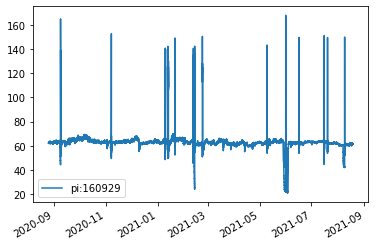

In [ ]:
my_time_series = c.time_series.retrieve(id=944003029648139)
my_time_series.plot(start="365d-ago", end="now")

In [17]:
from cognite.client.data_classes import Asset

In [19]:
subtree_root_asset="pi:160627"
subtree = c.assets.retrieve(external_id=subtree_root_asset).subtree()
related_events = subtree.events() 

AttributeError: ignored